## Exploratory Data Analysis on Trump's Tweet

### Goals

1. What are the top 20 most used words in the data? And how do they change over the time period?
2. Whether there are different people running Trump’s account: eg. sending device, time period, tweet?

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import math
import datetime

%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

/Users/ruoqizhang/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Viewing the Data

In [4]:
trump_tweets = pd.read_csv("data/tweets_scraped_11_07_2019.csv")
print(len(trump_tweets))

12323


In [5]:
trump_tweets.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for Android,Such a beautiful and important evening! The fo...,11-09-2016 11:36:58,220796,633253,False,796315640307060738
1,Twitter for iPhone,Happy 241st birthday to the U.S. Marine Corps!...,11-10-2016 19:31:27,45576,169729,False,796797436752707585
2,Twitter for Android,A fantastic day in D.C. Met with President Oba...,11-11-2016 02:10:46,37788,192638,False,796897928048766976
3,Twitter for Android,Just had a very open and successful presidenti...,11-11-2016 02:19:44,69498,231526,False,796900183955095552
4,Twitter for Android,Love the fact that the small groups of protest...,11-11-2016 11:14:20,55954,221718,False,797034721075228672


In [6]:
trump_tweets['created_at'] = pd.to_datetime(trump_tweets['created_at'])

In [7]:
trump_tweets.describe()

,retweet_count,favorite_count,id_str
count,12323.000000,12323.000000,1.232300e+04
mean,18573.566339,67049.472125,1.050969e+18
std,12417.851632,52784.541328,1.126138e+17
min,2.000000,0.000000,7.963156e+17
25%,11316.000000,28964.500000,9.623379e+17
50%,16690.000000,69022.000000,1.075722e+18
75%,23166.000000,96076.500000,1.150386e+18
max,369530.000000,879647.000000,1.192468e+18


### Word Frequency Analysis

We're hoping to have a sense of the topics that Donald Trump touch upon the most. From a generic sense, the words in Trump's tweet demonstrates the topic about which a tweet is concerning. We want to have a sense of Trump's favorite topics by seeing what his favorite words are. Furthermore, by tracking the frequency trend of a speicific word, we can also understand which topics were Trump paying attention to. For example, if Trump's tweets see an increasing frequency of words regarding international trade, stock market, U.S. and world economy, then it means that he may be paying more attention to similar topics. This increased attention would be likely correlated to the VIX index. Therefore, in this section, we lay the groundwork for the word frequency analysis, identifying popular words used by Donald Trump.

To achieve the goal, we use `textblob` package. We then inflect and lemmatize the textblob we got from the package for a word frequency analysis, to remove the impact of tenses and other factors.

To approach this problem, we first concatnate all of Donald Trump's tweets, and produce a textblob containing all of our collected tweets. We then extract all the nouns in the text blobs, since we're hoping to identify the prominent topics he's interested in, and nouns will give us the best insights of that. After extracting nouns, we singularize and lemmatize the nouns to ensure that all similar nouns with the same root are treated in the same way.

In [2]:
from textblob import TextBlob, Word
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))

In [8]:
trump_tweets['text_blob'] = trump_tweets['text'].apply(lambda text: TextBlob(text))

In [9]:
trump_tweets['words'] = trump_tweets['text_blob'].apply(lambda text_blob: text_blob.words.singularize().lemmatize())

In [10]:
trump_tweets['noun_phrases'] = trump_tweets['text_blob'].apply(lambda text_blob: text_blob.noun_phrases)

In [11]:
trump_tweets['noun_phrases'] = trump_tweets['noun_phrases'].apply(lambda noun_list: noun_list.singularize().lemmatize())

In [40]:
all_trump_blob = TextBlob(trump_tweets['text'].str.cat())
all_trump_noun = all_trump_blob.noun_phrases
[word for word in all_trump_noun if word not in stops]
all_trump_noun = lemmatize().singularize()
# all_trump_nouns = all_trump_blob.noun_phrases.singularize().lemmatize()

# bow = CountVectorizer()
# BOW = bow.fit_transform(all_trump_blob)
# bagOFwords = pd.DataFrame(BOW.toarray())
# bagOFwords.columns = bow.get_feature_names()


# vectorizer = TfidfVectorizer()
# got_tfidf = vectorizer.fit_transform(list(all_trump_blob))
# tfidf = pd.DataFrame(got_tfidf.toarray())
# tfidf.columns = vectorizer.get_feature_names()


KeyboardInterrupt: 

In [36]:
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(all_trump_blob)

train_vect

<339291x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 128446 stored elements in Compressed Sparse Row format>

In [37]:
tfidf.get_feature_names()

['00',
 '06',
 '10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '16',
 '17',
 '18',
 '20',
 '2016',
 '2017',
 '2018',
 '2020',
 '23',
 '24',
 '25',
 '2nd',
 '30',
 '50',
 'abc',
 'abe',
 'able',
 'absolutely',
 'abuse',
 'accomplished',
 'account',
 'acros',
 'act',
 'acting',
 'action',
 'actually',
 'adam',
 'additional',
 'addres',
 'administration',
 'advantage',
 'african',
 'afternoon',
 'agenda',
 'agent',
 'ago',
 'agree',
 'agreed',
 'agreement',
 'air',
 'al',
 'alabama',
 'alien',
 'allow',
 'allowed',
 'alway',
 'amazing',
 'amazon',
 'ambassador',
 'amendment',
 'america',
 'american',
 'amp',
 'andrew',
 'angry',
 'announce',
 'announced',
 'answer',
 'anthem',
 'anti',
 'anymore',
 'apologize',
 'approval',
 'approved',
 'area',
 'arizona',
 'arrived',
 'ask',
 'asked',
 'asking',
 'attack',
 'attorney',
 'away',
 'bad',
 'badly',
 'bank',
 'barr',
 'barrier',
 'based',
 'beat',
 'beautiful',
 'begin',
 'beginning',
 'behalf',
 'believe',
 'benefit',
 'bernie',
 'best',
 'bett

If we do not remove the nouns in our corpus, the 20 most frequent word obtained by TF-IDF algorithm are:

In [39]:
# print idf values
df_idf = pd.DataFrame(tfidf.idf_, index=tfidf.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['idf_weights'], ascending=False)


,idf_weights
single,10.238109
accomplished,10.238109
sadly,10.238109
helped,10.238109
tuckercarlson,10.238109
position,10.238109
monday,10.238109
importantly,10.238109
inaccurate,10.238109
trip,10.238109


### Tweet Published By?

Whether a tweet is published by Trump would also influence people's judgment, thereby impacting the market. We assume that the tweets published by Trump himself would have the largest impact on the market. Twitter provides information regarding how the tweets were posted, and here we count how many tweets were published by each source. Comparing them and trying to infer who's posting the tweets appearing on @realdonaldtrump.

We find that most of the tweets were published by `Twitter for iPhone`, followed by `Twitter for Android`.

In [53]:
tweet_source = trump_tweets.groupby('source').count()['text']
tweet_source

source
Media Studio              155
Twitter Ads                34
Twitter Media Studio      119
Twitter Web App             4
Twitter Web Client         65
Twitter for Android       436
Twitter for iPad           38
Twitter for iPhone      11472
Name: text, dtype: int64

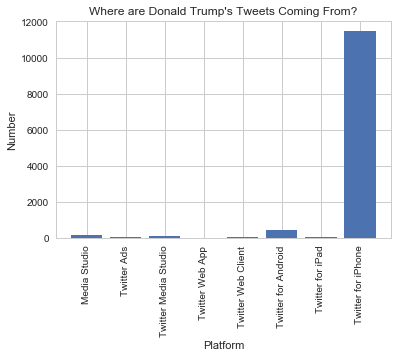

In [54]:
plt.bar(tweet_source.index, tweet_source)
plt.title('Where are Donald Trump\'s Tweets Coming From?')
plt.xlabel('Platform')
plt.ylabel('Number')
plt.xticks(rotation=90)
plt.show()

In [55]:
tweet_source.index.values

array(['Media Studio', 'Twitter Ads', 'Twitter Media Studio',
       'Twitter Web App', 'Twitter Web Client', 'Twitter for Android',
       'Twitter for iPad', 'Twitter for iPhone'], dtype=object)

In [56]:
trump_tweets['date'] = trump_tweets['created_at'].dt.date

trump_tweets['hour'] = trump_tweets['created_at'].dt.hour
trump_tweets['min'] = trump_tweets['created_at'].dt.minute

trump_tweets['time'] = trump_tweets.agg('{0[hour]}:{0[min]}'.format, axis=1)

In [57]:
trump_tweets.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,date,hour,min,time
0,Twitter for Android,Such a beautiful and important evening! The fo...,2016-11-09 11:36:58,220796,633253,False,796315640307060738,2016-11-09,11,36,11:36
1,Twitter for iPhone,Happy 241st birthday to the U.S. Marine Corps!...,2016-11-10 19:31:27,45576,169729,False,796797436752707585,2016-11-10,19,31,19:31
2,Twitter for Android,A fantastic day in D.C. Met with President Oba...,2016-11-11 02:10:46,37788,192638,False,796897928048766976,2016-11-11,2,10,2:10
3,Twitter for Android,Just had a very open and successful presidenti...,2016-11-11 02:19:44,69498,231526,False,796900183955095552,2016-11-11,2,19,2:19
4,Twitter for Android,Love the fact that the small groups of protest...,2016-11-11 11:14:20,55954,221718,False,797034721075228672,2016-11-11,11,14,11:14


In [58]:
grouped_freq = trump_tweets.groupby(['date', 'source']).size()
grouped_df = pd.DataFrame(grouped_freq)

In [59]:
cleaned_df = pd.DataFrame(columns=['date', 'source', 'num'])

for i in range(len(grouped_freq)):
    
    num = grouped_df.iloc[i].values[0]
    date = grouped_df.iloc[i].name[0]
    source = grouped_df.iloc[i].name[1]
    
    cleaned_df = cleaned_df.append({'date': date,
                                   'source': source,
                                   'num': num}, ignore_index=True)
    

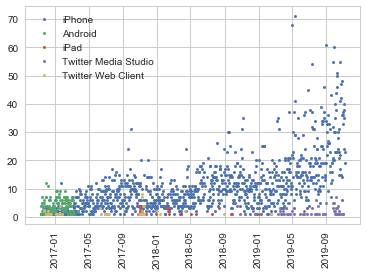

In [60]:
iphone = cleaned_df[cleaned_df['source'] == 'Twitter for iPhone']
android = cleaned_df[cleaned_df['source'] == 'Twitter for Android']
ipad = cleaned_df[cleaned_df['source'] == 'Twitter for iPad']
tms = cleaned_df[cleaned_df['source'] == 'Twitter Media Studio']
twc = cleaned_df[cleaned_df['source'] == 'Twitter Web Client']  

plt.plot_date(iphone['date'], iphone['num'], markersize = 3, label = 'iPhone')
plt.plot_date(android['date'], android['num'], markersize = 3, label = 'Android')
plt.plot_date(ipad['date'], ipad['num'], markersize = 3, label = 'iPad')
plt.plot_date(tms['date'], tms['num'], markersize = 3, label = 'Twitter Media Studio')
plt.plot_date(twc['date'], twc['num'], markersize = 3, label = 'Twitter Web Client')
plt.xticks(rotation = 'vertical')

plt.legend()
plt.show()

[]

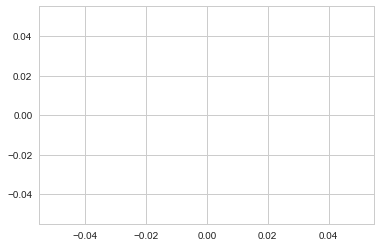

In [61]:
trump_tweets[trump_tweets['source'] == 'Twitter for iPhone']
plt.plot()

In [62]:
tgrouped_freq = trump_tweets.groupby(['hour', 'source']).size()
tgrouped_df = pd.DataFrame(tgrouped_freq)
tcleaned_df = pd.DataFrame()

for i in range(len(tgrouped_df)):
    
    num = tgrouped_df.iloc[i].values[0]
    hour = tgrouped_df.iloc[i].name[0]
    source = tgrouped_df.iloc[i].name[1]
    
    tcleaned_df = tcleaned_df.append({'hour': hour,
                                   'source': source,
                                   'num': num}, ignore_index=True)


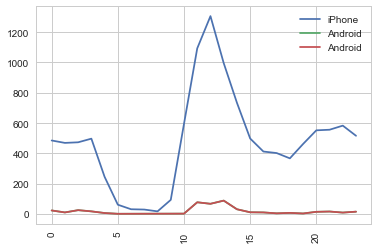

In [63]:
plt.plot(tcleaned_df[tcleaned_df['source'] == 'Twitter for iPhone']['hour'], 
         tcleaned_df[tcleaned_df['source'] == 'Twitter for iPhone']['num'], markersize = 3, label = 'iPhone')
plt.plot(tcleaned_df[tcleaned_df['source'] == 'Twitter for Android']['hour'], 
         tcleaned_df[tcleaned_df['source'] == 'Twitter for Android']['num'], markersize = 3, label = 'Android')
plt.plot(tcleaned_df[tcleaned_df['source'] == 'Twitter for Android']['hour'], 
         tcleaned_df[tcleaned_df['source'] == 'Twitter for Android']['num'], markersize = 3, label = 'Android')


# plt.plot_date(android['date'], android['num'], markersize = 3, label = 'Android')
# plt.plot_date(ipad['date'], ipad['num'], markersize = 3, label = 'iPad')
# plt.plot_date(tms['date'], tms['num'], markersize = 3, label = 'Twitter Media Studio')
# plt.plot_date(twc['date'], twc['num'], markersize = 3, label = 'Twitter Web Client')
plt.xticks(rotation = 'vertical')

plt.legend()
plt.show()

#### REMOVING RETWEETS AND HREFS

In [128]:
un_rt = trump_tweets[trump_tweets['is_retweet']  == False]

un_rt['linked'] = un_rt['text'].str.contains('https://t.co/') == True

un_rt['id_str'] = un_rt['id_str'].astype(str)

# un_rt_href = un_rt[un_rt['text'].str.contains('https://t.co/') == False]

/Users/ruoqizhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ruoqizhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [129]:
un_rt['text'] = un_rt['text'].str.lower()

un_rt

/Users/ruoqizhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,date,hour,min,time,linked
0,Twitter for Android,such a beautiful and important evening! the fo...,2016-11-09 11:36:58,220796,633253,False,796315640307060738,2016-11-09,11,36,11:36,False
1,Twitter for iPhone,happy 241st birthday to the u.s. marine corps!...,2016-11-10 19:31:27,45576,169729,False,796797436752707585,2016-11-10,19,31,19:31,True
2,Twitter for Android,a fantastic day in d.c. met with president oba...,2016-11-11 02:10:46,37788,192638,False,796897928048766976,2016-11-11,2,10,2:10,False
3,Twitter for Android,just had a very open and successful presidenti...,2016-11-11 02:19:44,69498,231526,False,796900183955095552,2016-11-11,2,19,2:19,False
4,Twitter for Android,love the fact that the small groups of protest...,2016-11-11 11:14:20,55954,221718,False,797034721075228672,2016-11-11,11,14,11:14,False
5,Twitter for Android,busy day planned in new york. will soon be mak...,2016-11-11 13:33:35,33324,178189,False,797069763801387008,2016-11-11,13,33,13:33,False
6,Twitter for iPhone,today we express our deepest gratitude to all ...,2016-11-11 15:26:37,47145,168933,False,797098212599496704,2016-11-11,15,26,15:26,True
7,Twitter for Android,this will prove to be a great time in the live...,2016-11-12 15:05:33,53578,201692,False,797455295928791040,2016-11-12,15,5,15:5,False
8,Twitter for Android,wow the @nytimes is losing thousands of subscr...,2016-11-13 14:16:46,34967,127171,False,797805407179866112,2016-11-13,14,16,14:16,False
9,Twitter for Android,the @nytimes sent a letter to their subscriber...,2016-11-13 14:43:09,22131,86992,False,797812048805695488,2016-11-13,14,43,14:43,False


In [88]:
un_rt

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,date,hour,min,time,linked
0,Twitter for Android,Such a beautiful and important evening! The fo...,2016-11-09 11:36:58,220796,633253,False,796315640307060738,2016-11-09,11,36,11:36,False
1,Twitter for iPhone,Happy 241st birthday to the U.S. Marine Corps!...,2016-11-10 19:31:27,45576,169729,False,796797436752707585,2016-11-10,19,31,19:31,True
2,Twitter for Android,A fantastic day in D.C. Met with President Oba...,2016-11-11 02:10:46,37788,192638,False,796897928048766976,2016-11-11,2,10,2:10,False
3,Twitter for Android,Just had a very open and successful presidenti...,2016-11-11 02:19:44,69498,231526,False,796900183955095552,2016-11-11,2,19,2:19,False
4,Twitter for Android,Love the fact that the small groups of protest...,2016-11-11 11:14:20,55954,221718,False,797034721075228672,2016-11-11,11,14,11:14,False
5,Twitter for Android,Busy day planned in New York. Will soon be mak...,2016-11-11 13:33:35,33324,178189,False,797069763801387008,2016-11-11,13,33,13:33,False
6,Twitter for iPhone,Today we express our deepest gratitude to all ...,2016-11-11 15:26:37,47145,168933,False,797098212599496704,2016-11-11,15,26,15:26,True
7,Twitter for Android,This will prove to be a great time in the live...,2016-11-12 15:05:33,53578,201692,False,797455295928791040,2016-11-12,15,5,15:5,False
8,Twitter for Android,Wow the @nytimes is losing thousands of subscr...,2016-11-13 14:16:46,34967,127171,False,797805407179866112,2016-11-13,14,16,14:16,False
9,Twitter for Android,The @nytimes sent a letter to their subscriber...,2016-11-13 14:43:09,22131,86992,False,797812048805695488,2016-11-13,14,43,14:43,False


In [65]:
unhrefrt_grouped_freq = un_rt_href.groupby(['hour', 'source']).size()
unref_df = pd.DataFrame(unhrefrt_grouped_freq)
unref_df_cl = pd.DataFrame()

for i in range(len(unref_df)):
    
    num = unref_df.iloc[i].values[0]
    hour = unref_df.iloc[i].name[0]
    source = unref_df.iloc[i].name[1]
    
    unref_df_cl = unref_df_cl.append({'hour': hour,
                                   'source': source,
                                   'num': num}, ignore_index=True)


In [66]:
unref_df_cl

,hour,num,source
0,0.0,4.0,Twitter Web Client
1,0.0,23.0,Twitter for Android
2,0.0,244.0,Twitter for iPhone
3,1.0,3.0,Twitter Web Client
4,1.0,10.0,Twitter for Android
5,1.0,209.0,Twitter for iPhone
6,2.0,24.0,Twitter for Android
7,2.0,199.0,Twitter for iPhone
8,3.0,17.0,Twitter for Android
9,3.0,167.0,Twitter for iPhone


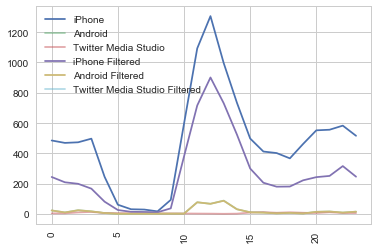

In [67]:
plt.plot(tcleaned_df[tcleaned_df['source'] == 'Twitter for iPhone']['hour'], 
         tcleaned_df[tcleaned_df['source'] == 'Twitter for iPhone']['num'], markersize = 3, label = 'iPhone')
plt.plot(tcleaned_df[tcleaned_df['source'] == 'Twitter for Android']['hour'], 
         tcleaned_df[tcleaned_df['source'] == 'Twitter for Android']['num'], markersize = 3, alpha = 0.5, label = 'Android')
plt.plot(tcleaned_df[tcleaned_df['source'] == 'Twitter Media Studio']['hour'], 
         tcleaned_df[tcleaned_df['source'] == 'Twitter Media Studio']['num'], markersize = 3, alpha =0.5, label = 'Twitter Media Studio')


plt.plot(unref_df_cl[unref_df_cl['source'] == 'Twitter for iPhone']['hour'], 
         unref_df_cl[unref_df_cl['source'] == 'Twitter for iPhone']['num'], markersize = 3, label = 'iPhone Filtered')
plt.plot(unref_df_cl[unref_df_cl['source'] == 'Twitter for Android']['hour'], 
         unref_df_cl[unref_df_cl['source'] == 'Twitter for Android']['num'], markersize = 3, label = 'Android Filtered')
plt.plot(unref_df_cl[unref_df_cl['source'] == 'Twitter Media Studio']['hour'], 
         unref_df_cl[unref_df_cl['source'] == 'Twitter Media Studio']['num'], markersize = 3, alpha =0.5,label = 'Twitter Media Studio Filtered')


# plt.plot_date(android['date'], android['num'], markersize = 3, label = 'Android')
# plt.plot_date(ipad['date'], ipad['num'], markersize = 3, label = 'iPad')
# plt.plot_date(tms['date'], tms['num'], markersize = 3, label = 'Twitter Media Studio')
# plt.plot_date(twc['date'], twc['num'], markersize = 3, label = 'Twitter Web Client')
plt.xticks(rotation = 'vertical')

plt.legend()
plt.show()

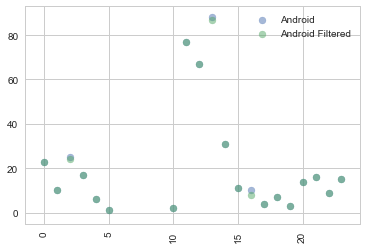

In [68]:
plt.scatter(tcleaned_df[tcleaned_df['source'] == 'Twitter for Android']['hour'], 
         tcleaned_df[tcleaned_df['source'] == 'Twitter for Android']['num'], alpha = 0.5, label = 'Android')
plt.scatter(unref_df_cl[unref_df_cl['source'] == 'Twitter for Android']['hour'], 
         unref_df_cl[unref_df_cl['source'] == 'Twitter for Android']['num'], alpha = 0.5, label = 'Android Filtered')
plt.xticks(rotation = 'vertical')

plt.legend()
plt.show()

**The highly overlapping nature between Android and the filtered Andriod tweet set indicates that these tweets are consistent with our expectation of Donald Trump's tweeting behavior - namely that he does not usually retweet or post images.**

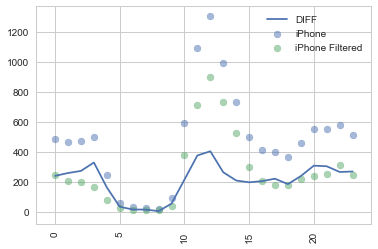

In [69]:
plt.scatter(tcleaned_df[tcleaned_df['source'] == 'Twitter for iPhone']['hour'], 
         tcleaned_df[tcleaned_df['source'] == 'Twitter for iPhone']['num'], alpha = 0.5, label = 'iPhone')
plt.scatter(unref_df_cl[unref_df_cl['source'] == 'Twitter for iPhone']['hour'], 
         unref_df_cl[unref_df_cl['source'] == 'Twitter for iPhone']['num'], alpha = 0.5, label = 'iPhone Filtered')

plt.plot(tcleaned_df[tcleaned_df['source'] == 'Twitter for iPhone']['hour'],
        (np.array(tcleaned_df[tcleaned_df['source'] == 'Twitter for iPhone']['num']) - 
         np.array(unref_df_cl[unref_df_cl['source'] == 'Twitter for iPhone']['num'])),
        label = "DIFF")

plt.xticks(rotation = 'vertical')

plt.legend()
plt.show()


In [70]:
unref_df_cl

,hour,num,source
0,0.0,4.0,Twitter Web Client
1,0.0,23.0,Twitter for Android
2,0.0,244.0,Twitter for iPhone
3,1.0,3.0,Twitter Web Client
4,1.0,10.0,Twitter for Android
5,1.0,209.0,Twitter for iPhone
6,2.0,24.0,Twitter for Android
7,2.0,199.0,Twitter for iPhone
8,3.0,17.0,Twitter for Android
9,3.0,167.0,Twitter for iPhone


In [71]:
un_rt_href[un_rt_href.text.str.contains('#')].text



23       My transition team which is working long hours...
70       @FiIibuster: @jeffzeleny Pathetic - you have n...
98       @TigerWoods: Can’t wait to get back out there ...
174      @EazyMF_E: @realDonaldTrump Many people are no...
245      ........may be their number one act and priori...
317      Congrats to the Senate for taking the first st...
373      power from Washington D.C. and giving it back ...
376      The forgotten men and women of our country wil...
378      We will follow two simple rules: BUY AMERICAN ...
415      The #MarchForLife is so important. To all of y...
474      I will be interviewed by @oreillyfactor at 4:0...
475      Enjoy the #SuperBowl and then we continue: MAK...
484      I don't know Putin have no deals in Russia and...
485      I don't know Putin have no deals in Russia and...
713      ...money to Bill the Hillary Russian "reset" p...
732      Where are @RepMarkMeadows @Jim_Jordan and @Rau...
779      Happy Passover to everyone celebrating in the .

In [133]:
# un_rt.to_csv("unrt.csv")

un_rt.to_excel("unrt.xlsx")

In [29]:
un_rt.sample(100).to_csv("sample.csv")

In [36]:
un_rt['text'] = un_rt['text'].str.lower()

un_rt

/Users/ruoqizhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,date,hour,min,time
0,Twitter for Android,such a beautiful and important evening! the fo...,2016-11-09 11:36:58,220796,633253,False,796315640307060738,2016-11-09,11,36,11:36
1,Twitter for iPhone,happy 241st birthday to the u.s. marine corps!...,2016-11-10 19:31:27,45576,169729,False,796797436752707585,2016-11-10,19,31,19:31
2,Twitter for Android,a fantastic day in d.c. met with president oba...,2016-11-11 02:10:46,37788,192638,False,796897928048766976,2016-11-11,2,10,2:10
3,Twitter for Android,just had a very open and successful presidenti...,2016-11-11 02:19:44,69498,231526,False,796900183955095552,2016-11-11,2,19,2:19
4,Twitter for Android,love the fact that the small groups of protest...,2016-11-11 11:14:20,55954,221718,False,797034721075228672,2016-11-11,11,14,11:14
5,Twitter for Android,busy day planned in new york. will soon be mak...,2016-11-11 13:33:35,33324,178189,False,797069763801387008,2016-11-11,13,33,13:33
6,Twitter for iPhone,today we express our deepest gratitude to all ...,2016-11-11 15:26:37,47145,168933,False,797098212599496704,2016-11-11,15,26,15:26
7,Twitter for Android,this will prove to be a great time in the live...,2016-11-12 15:05:33,53578,201692,False,797455295928791040,2016-11-12,15,5,15:5
8,Twitter for Android,wow the @nytimes is losing thousands of subscr...,2016-11-13 14:16:46,34967,127171,False,797805407179866112,2016-11-13,14,16,14:16
9,Twitter for Android,the @nytimes sent a letter to their subscriber...,2016-11-13 14:43:09,22131,86992,False,797812048805695488,2016-11-13,14,43,14:43


In [132]:
un_rt.id_str

0         796315640307060738
1         796797436752707585
2         796897928048766976
3         796900183955095552
4         797034721075228672
5         797069763801387008
6         797098212599496704
7         797455295928791040
8         797805407179866112
9         797812048805695488
10        797812630312382464
11        797822192931262470
12        797823553244712960
13        797832229800050688
14        797839801735114752
15        797873313561198593
16        798519600413601792
17        798521053551140864
18        798721142525665280
19        798850338384023552
20        798861300453539840
21        798862483255652352
22        798864532433211392
23        799232214793760768
24        799432403727028224
25        799435824622252032
27        799742847310319616
28        799969130237542400
29        799970371705380864
30        799972624713420804
                ...         
12287    1191937709364928513
12288    1191941077646876672
12289    1191942342879666178
12290    11919

In [31]:
word_list = ["stock", 'market', "agreement", "negotiator", "negotiation", 
             "trade", "china", "economy", "job", "tariff", "employment",
            "s&p", "auto", "farmer"]



In [37]:
for num, word in enumerate(word_list):
    
    un_rt["exist_{}".format(word)] = un_rt['text'].str.contains(word) == True  
    

/Users/ruoqizhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [124]:
sentiment = pd.read_csv("sentiment_df.csv")
sentiment.id_str

0       7.960000e+17
1       7.970000e+17
2       7.970000e+17
3       7.970000e+17
4       7.970000e+17
5       7.970000e+17
6       7.980000e+17
7       7.980000e+17
8       7.980000e+17
9       7.980000e+17
10      7.980000e+17
11      7.980000e+17
12      7.980000e+17
13      7.980000e+17
14      7.990000e+17
15      7.990000e+17
16      7.990000e+17
17      7.990000e+17
18      7.990000e+17
19      7.990000e+17
20      7.990000e+17
21      7.990000e+17
22      7.990000e+17
23      7.990000e+17
24      8.000000e+17
25      8.000000e+17
26      8.000000e+17
27      8.000000e+17
28      8.000000e+17
29      8.000000e+17
            ...     
6839    1.190000e+18
6840    1.190000e+18
6841    1.190000e+18
6842    1.190000e+18
6843    1.190000e+18
6844    1.190000e+18
6845    1.190000e+18
6846    1.190000e+18
6847    1.190000e+18
6848    1.190000e+18
6849    1.190000e+18
6850    1.190000e+18
6851    1.190000e+18
6852    1.190000e+18
6853    1.190000e+18
6854    1.190000e+18
6855    1.190

In [127]:
sentiment['id_str'] = sentiment['id_str'].astype(str)
sentiment['id_str']

SyntaxError: invalid syntax (<ipython-input-127-676fe1c353f3>, line 1)

In [105]:
pd.merge(un_rt, sentiment[['hash', 'dot', 'polarity', 'favorite', 'id_str']], on='id_str')

# joined = un_rt.join(sentiment[['hash', 'dot', 'polarity', 'favorite', 'id_str']], on='id_str')


,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,date,hour,min,time,linked,hash,dot,polarity,favorite


In [102]:
joined

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,date,hour,min,time,linked,hash,dot,polarity,favorite
